# Project : Heart Disease Prediction

Heart disease is the number one cause of death worldwide, so, in this notebook we will try to use data science for the good reason i.e., predicting heart disease.To learn how to prevent heart disease we must first learn to reliably detect it.

The dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

Data is provided courtesy of the [Cleveland Heart Disease Database](http://archive.ics.uci.edu/ml/datasets/statlog+(heart)) via the **UCI Machine Learning repository**.

Aha, D., and Dennis Kibler. **"Instance-based prediction of heart-disease presence with the Cleveland database."** University of California 3.1 (1988): 3-2.

# About Dataset

This database contains 13 attributes (which have been extracted from
a larger set of 75)       
  


## Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect     

## Attributes types
-----------------

Real: 1,4,5,8,10,12
Ordered:11,
Binary: 2,6,9
Nominal:7,3,13

## Variable to be predicted
------------------------
Absence (1) or presence (2) of heart disease

No missing values.

270 observations




## Importing Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Reading dataset 
df=pd.read_csv('heart_disease.csv')

In [3]:
# Checking first few entries of the dataset
df.head()

,Age,Sex,Chest_Pain_type,resting_bp,serum_choles,fasting_blood_sugar,resting_electro,max_heart_rate,ex_ind_angina,old_peak,slope,no_major_vessl,thal,disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [7]:
# looking into the summary of the dataset such as mean, standard deviation minimum and maximum values of the attributes
df.describe()

,Age,Sex,Chest_Pain_type,resting_bp,serum_choles,fasting_blood_sugar,resting_electro,max_heart_rate,ex_ind_angina,old_peak,slope,no_major_vessl,thal,disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [8]:
# checking the number of observation i.e., number of rows and columns/features
df.shape

(270, 14)

There are 270 observations and around 14 column including target variable here disease is the target variable

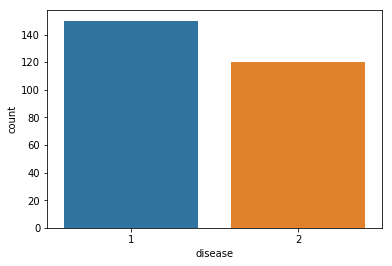

In [11]:
# Checking the number of disease and healthy observations 
sns.countplot(df['disease'], label = "Count") 

It seems it has a balanced dataset as it has nearly 150 healthy observations and around 120 disease observations.

In [12]:
df.columns

Index(['Age', 'Sex', 'Chest_Pain_type', 'resting_bp', 'serum_choles',
       'fasting_blood_sugar', 'resting_electro', 'max_heart_rate',
       'ex_ind_angina', 'old_peak', 'slope', 'no_major_vessl', 'thal',
       'disease'],
      dtype='object')

# Exploratory data Analysis

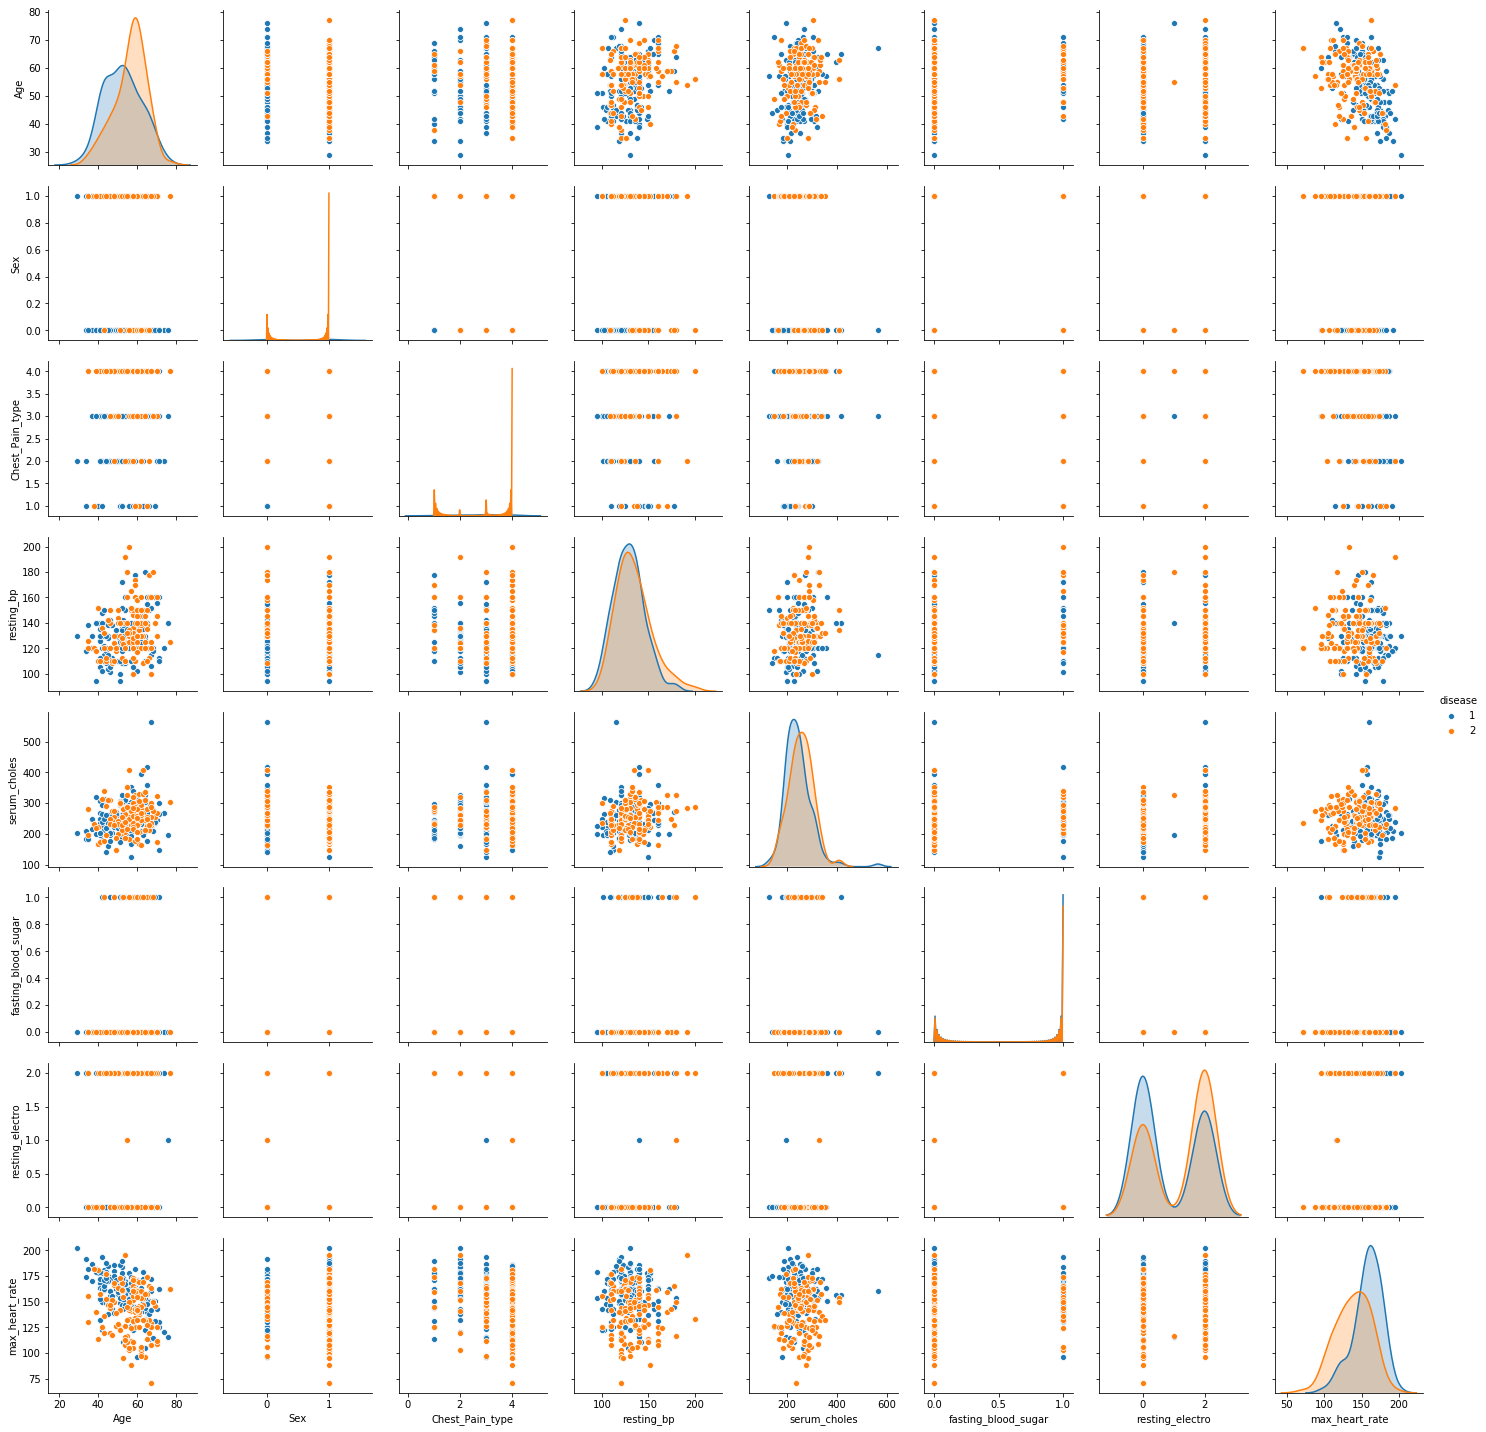

In [13]:
sns.pairplot(df, hue = 'disease', vars = ['Age', 'Sex', 'Chest_Pain_type', 'resting_bp', 'serum_choles',
       'fasting_blood_sugar', 'resting_electro', 'max_heart_rate'] )

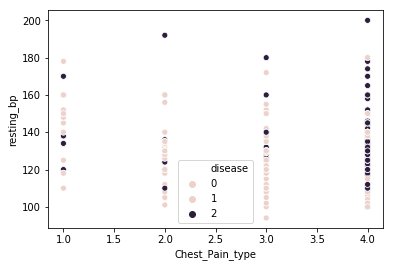

In [14]:
sns.scatterplot(x = 'Chest_Pain_type', y = 'resting_bp', hue = 'disease', data = df)

In [15]:
df.disease.unique()

array([2, 1], dtype=int64)

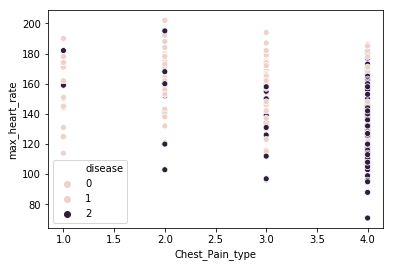

In [16]:
sns.scatterplot(x = 'Chest_Pain_type', y = 'max_heart_rate', hue = 'disease', data = df)

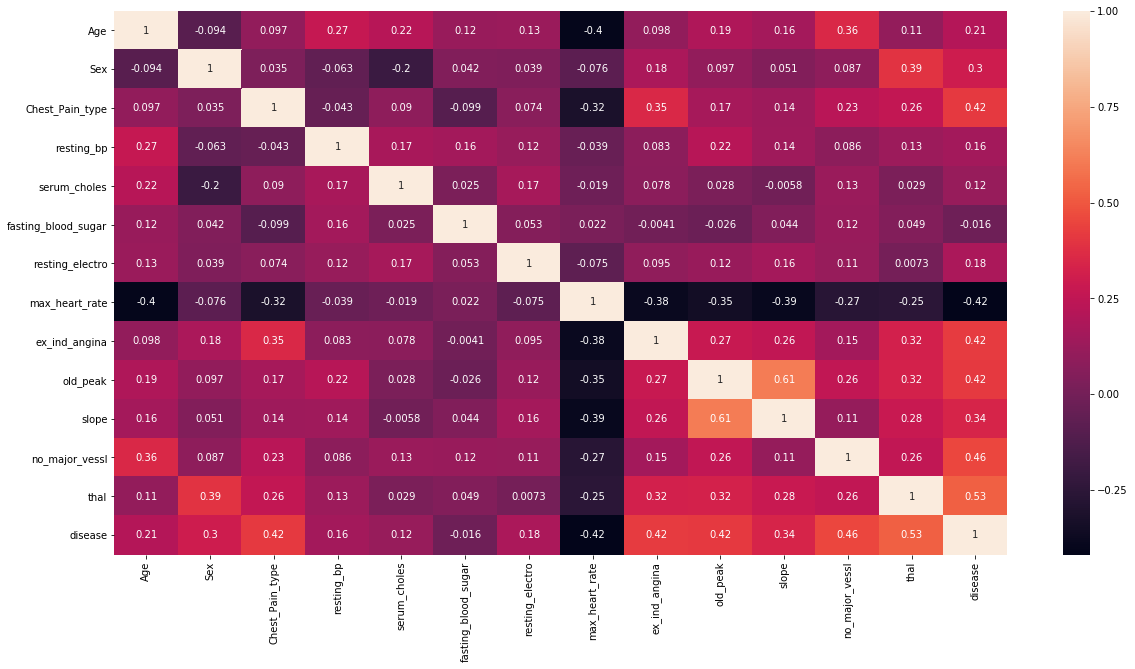

In [19]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)

In [20]:
# Let's drop the target label coloumns
X = df.drop(['disease'],axis=1)


In [21]:
y = df['disease']


In [22]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state=5)

In [23]:
X_train.shape

(243, 13)

In [24]:
X_test.shape

(27, 13)

In [26]:

svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)

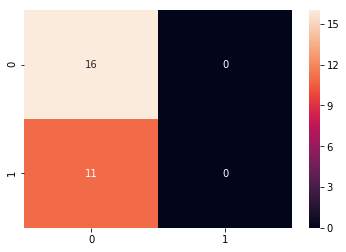

In [28]:
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.59      1.00      0.74        16
           2       0.00      0.00      0.00        11

   micro avg       0.59      0.59      0.59        27
   macro avg       0.30      0.50      0.37        27
weighted avg       0.35      0.59      0.44        27



C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Impoving the model : Normalizing the dataset

In this step we will normalize the dataset by appl z-score normalization

In [30]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [31]:
X_train_scaled.head()

,Age,Sex,Chest_Pain_type,resting_bp,serum_choles,fasting_blood_sugar,resting_electro,max_heart_rate,ex_ind_angina,old_peak,slope,no_major_vessl,thal
167,0.500000,1.0,0.666667,0.339623,0.162100,1.0,1.0,0.561404,0.0,0.193548,1.0,0.000000,0.00
127,0.479167,0.0,0.666667,0.396226,0.159817,0.0,1.0,0.710526,0.0,0.016129,0.5,0.000000,0.00
198,0.833333,0.0,0.000000,0.433962,0.257991,0.0,0.0,0.552632,0.0,0.290323,0.0,0.666667,0.00
6,0.562500,1.0,0.666667,0.339623,0.296804,1.0,1.0,0.473684,1.0,0.096774,0.5,0.333333,0.75
186,0.562500,1.0,1.000000,0.358491,0.132420,0.0,1.0,0.149123,1.0,0.338710,0.5,0.333333,0.75


In [32]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [33]:


svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

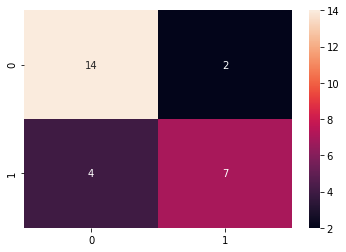

In [34]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.78      0.88      0.82        16
           2       0.78      0.64      0.70        11

   micro avg       0.78      0.78      0.78        27
   macro avg       0.78      0.76      0.76        27
weighted avg       0.78      0.78      0.77        27



## Parameter tuning SVC

In [36]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,y_train)

C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8170731707317073, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8518518518518519, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=0.7625, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8170731707317073, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8395061728395061, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.4s finished
C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [37]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [38]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
grid_predictions = grid.predict(X_test_scaled)

In [40]:
cm = confusion_matrix(y_test, grid_predictions)

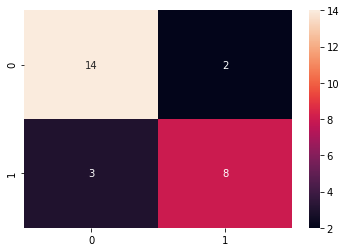

In [41]:
sns.heatmap(cm, annot=True)

In [43]:

sig_score = log_loss(y_test, grid_predictions)

In [44]:
print(" *Log Loss of  SVC classifier trained"
      ": %.3f" % sig_score)

 *Log Loss of  SVC classifier trained: 20.468


In [45]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.82      0.88      0.85        16
           2       0.80      0.73      0.76        11

   micro avg       0.81      0.81      0.81        27
   macro avg       0.81      0.80      0.81        27
weighted avg       0.81      0.81      0.81        27



In [46]:

lr =LogisticRegression()
lr.fit(X_train_scaled, y_train)

C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

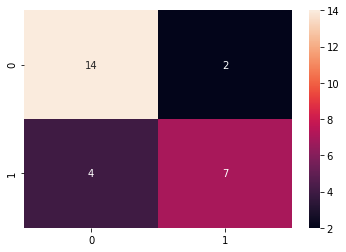

In [47]:
y_predict = lr.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [54]:

random_forest = RandomForestClassifier(n_estimators = 20, criterion = 'gini', random_state = 0)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

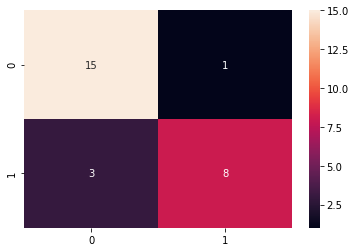

In [55]:
y_predict = random_forest.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm,annot=True,fmt="d")

In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88        16
           2       0.89      0.73      0.80        11

   micro avg       0.85      0.85      0.85        27
   macro avg       0.86      0.83      0.84        27
weighted avg       0.86      0.85      0.85        27



## Parameter tuning : Random forest

In [71]:
param_grid = {'criterion':['gini'],
    'n_estimators': [10,15,20,30,40,50,100],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5,refit=True,verbose=4)
CV_rfc.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, score=0.8775510204081632, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, score=0.8163265306122449, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, score=0.7959183673469388, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, score=0.7551020408163265, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=10 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=10, score=0.8936170212765957, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=15 ..............
[CV]  criterion=gini, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, n_estimators=15, score=0.7959183673469388, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=15 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=15, score=0.8163265306122449, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=15 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=15, score=0.7755102040816326, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=15 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=15, score=0.9148936170212766, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=20 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=20, score=0.8979591836734694, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=20 ..............
[CV]  criterion=gini, max_features=auto, n_estimators=20, score=0.7959183673469388, total=   0.0s
[CV] criterion=gini, max_features=auto, n_estimators=20 .

[CV]  criterion=gini, max_features=sqrt, n_estimators=40, score=0.8163265306122449, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=40 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=40, score=0.7755102040816326, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=40 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=40, score=0.851063829787234, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=50 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=50, score=0.8367346938775511, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=50 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=50, score=0.8367346938775511, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=50 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=50, score=0.8163265306122449, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=50 ..

[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    7.1s finished
C:\Users\sid321axn\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini'], 'n_estimators': [10, 15, 20, 30, 40, 50, 100], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [72]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 15}

In [73]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

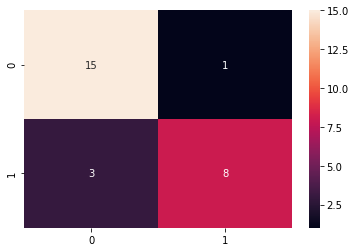

In [74]:
grid_predictions = CV_rfc.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_predictions)

sns.heatmap(cm,annot=True,fmt="d")

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.83      0.94      0.88        16
           2       0.89      0.73      0.80        11

   micro avg       0.85      0.85      0.85        27
   macro avg       0.86      0.83      0.84        27
weighted avg       0.86      0.85      0.85        27

